Introduction:
=========
* Data used in this project is of Supermarket sales data 

* The given data has information about location of the supermarket , different product lines sold in the supermarket,
  sales & profit data for the first 3 months of the Year 2019(i.e., january , Febraury , March.) ,
  & also has rating given by the customers for their experience of shopping in the supermarket.
  
* dataset contains 17 features & 1000 observations

# Basic Exploration of the data in the dataset & understanding different features of the data.

In [881]:
#Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats

### Reading the data

In [882]:
df = pd.read_csv(r'F:\Python\Datasets\supermarket_sales.csv') 

* Loading data the present in the csv file to the Pandas DataFrame using " read_csv "  method of Pandas

In [883]:
df.shape # exploring number of observations and variables
# purpose to crosscheck features & columns 

(1000, 17)

* All the features & Observations present in the original data have been correctly loaded in to pandas DataFrame  

In [884]:
df.columns # different features present in the data

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [885]:
display(df.head(),df.tail()) 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


* Seeing the Top 5 rows & bottom 5 rows of dataframe to get a basic idea of how what type of is present in each feature & find out any anomalies in the data.

In [886]:
df.info() # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* The info() method on pandas Dataframe gives us information about different features present in the data , count of non-null observations for each feature & also let us know how pandas is reading each feature .

* In present dataframe we have 17 different features & each feature has 1000 non-null observations present it.

* Pandas has read all the feature types correctly except for Date & Time features . They both are being read as object datatype,   because of presence of special symbols in between them.

* They are ought be read as pandas datetime datatype. we can convert them to correct datatype in further analysis.

In [887]:
df.isnull().sum() # check for missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

* The above o/p of the isnull().sum() function shows that there are zero missing values in each column of the dataframe

* This output once again confirms there are no missing values present in the data

In [888]:
df.nunique() # finding the number of unique values for each feature of the dataframe

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

* From above o/p its clear that
  
  Invoice ID has 1000 unique values which is equal to number of observations present in the data.
  
  This suggests that this feature is not useful in our analysis.


* All the categorical features(i.e., object type data) have limited number of unique values


* The gross margin percentage feature has single unique value 
This conveys that supermarket makes same percentage of profit for every sale made.

##### Printing out the all the unique values present in each categorical feature(i.e., object type data) of the dataset.

In [889]:
columns = ['Branch','City','Customer type','Gender','Product line','Payment']
for i in columns:
    print()
    print(i)
    print(df[i].unique())


Branch
['A' 'C' 'B']

City
['Yangon' 'Naypyitaw' 'Mandalay']

Customer type
['Member' 'Normal']

Gender
['Female' 'Male']

Product line
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

Payment
['Ewallet' 'Cash' 'Credit card']


### Observations:
* The data contains information about three different branches of supermarket. They are Branch A ,Branch B ,Branch C.


* The dataset contains inforamtion of three different cities present in Myanmar , namely the city of Yangon , the city of     Naypyitaw & the city of Mandalay.

  
* There are two customer types that visit & shop in the supermarket .Member type customer , who is part of supermarket loyality   progarm & Normal type Customer , who is not part of any loyality program of supermarket.


* Supermarket sells six different lines of products( line means a category)

    The six different categories are
    
    -> Health and beauty
    
    -> Electronic accessories
    
    -> Home and lifestyle
    
    -> Sports and travel
    
    -> Food and beverages
    
    -> Fashion accessories
    
* Supermarket accepts payment from customers in three different forms. It accepts hand cash , also accepts payment via 
  credit-card & also accepts digital wallet payments. 

In [890]:
df.groupby(['Branch','City']).size()

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
dtype: int64

Observation:

* Upon grouping & digging deep found that each branch of the supermarket corresponds to a different city.
    
    -> So, 
    * branch A of supermarket is in the city of Yangon
    * branch B of supermarket is in the city of Mandalay
    * branch C of supermarket is in the city of Naypyitaw
    

In [891]:
df.drop_duplicates()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


* Dropping duplicating observations present if any , because if duplicate observations present they will introduce bais in to  the model.
* But it seems to be there are no duplicate observations present.

In [892]:
df.describe(include = 'all') # to g

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


Observation :
   *  Exploring the Count of observations ,five point summary(minimum , 25th percentile , 50th percentile or median , 
      75th percentile , maximun) , Mean & Standard deviation of each numerical column.
      
   * Exploring Count of observations , Number of unique categories & Most frequent category of each categorical column of the 
     dataset.

In [893]:
# Renaming columns 
df.rename(columns={'Invoice ID':'Invoice_ID','Customer type':'Customer_type','Product line':'Product_line','Unit price':'Unit_price','Tax 5%':'Tax_5%','gross margin percentage':'gross_margin_percentage','gross income':'gross_income'})

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


* Renaming columns that contains spaces in their names using rename method of pandas. Replacing space with an underscore

### Exploring the distributions of both numerical & categorical columns

### Categorical :

#### Branch

In [894]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [895]:
branches  = df['Branch'].value_counts().index
branches_count = df['Branch'].value_counts().values

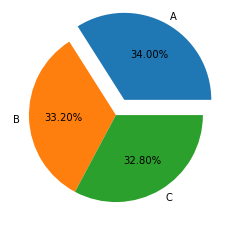

In [896]:
temp1 = [0.2,0,0]
plt.pie(x=branches_count , labels = branches , autopct = '%.2f%%',explode = temp1)
plt.show()

Observation:
 * Among the total observations recorded 34 perecent of observations belong to branch 'A', 33.2 percent belong to branch 'B'
   & remaining 32.8 percent belong to branch 'C'.


#### City

In [897]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [898]:
Cities  = df['City'].value_counts().index
city_count = df['City'].value_counts().values

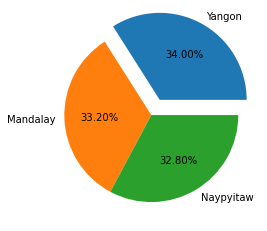

In [899]:
plt.pie(x=city_count , labels = Cities , autopct = '%.2f%%',explode = temp1)
plt.show()

Obsevations :
   *    Among the total observations recorded 34 perecent of observations come from the city of Yangon , 33.2 percent come from         the city of Mandalay & remaining 32.8 percent come from the city of Naypyitaw.  

   
   *  By comparing pie charts of both Branch & city Once again we can conifrm from the chart that 
      
      Branch 'A' is present in Yangon city,
      
      Branch 'B' is present in Mandalay city &
      
      Branch 'C' is present in Naypyitaw city.  

#### Customer type

In [900]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [901]:
C_types  = df['Customer type'].value_counts().index
Customer_count = df['Customer type'].value_counts().values

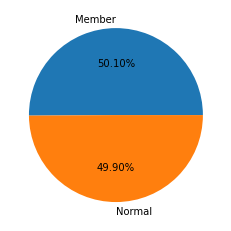

In [902]:
plt.pie(x=Customer_count , labels = C_types , autopct = '%.2f%%')
plt.show()

Observations :

* Dataset has almost equal number of observations for the two types of Customers the supermarket has  

#### Gender

In [903]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [904]:
Gender_types  = df['Gender'].value_counts().index
Gender_count = df['Gender'].value_counts().values

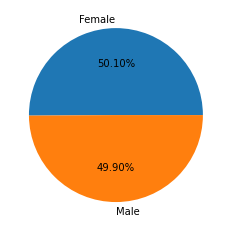

In [905]:
plt.pie(x=Gender_count , labels = Gender_types , autopct = '%.2f%%')
plt.show()

Observations :
* Dataset has almost equal number of observations for the two Genders  

#### Product line

In [906]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [907]:
Pd_line_types  = df['Product line'].value_counts().index
pd_line_count = df['Product line'].value_counts().values

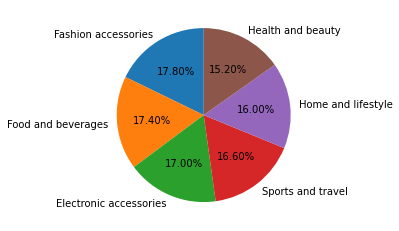

In [908]:
plt.pie(x=pd_line_count , labels = Pd_line_types , autopct = '%.2f%%',startangle =90)
plt.show()

* Portions of different product lines   

    -> Fashion accessories are having high demand & health and beauty seems to have less demand

#### Payment

In [909]:
 df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [910]:
Payment_types  = df['Payment'].value_counts().index
Payment_type_count = df['Payment'].value_counts().values

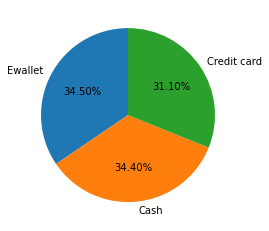

In [911]:
plt.pie(x=Payment_type_count , labels = Payment_types , autopct = '%.2f%%',startangle =90)
plt.show()

Observation:

    -> Most customers of the supermarket are preferring payment through Ewallet/cash.
    
    -> credit card type of payment is least preferred comparing with others

In [912]:
[i for i in df.columns if df[i].dtype == 'object']

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [913]:
[i for i in df.columns if df[i].dtype != 'object']

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

### Numerical 

#### Unit Price

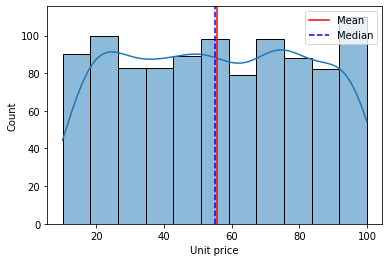

In [914]:
sns.histplot(data = df['Unit price'],kde = True)
plt.axvline(x=df['Unit price'].mean(),c='red',label='Mean')
plt.axvline(x=df['Unit price'].median(),c='blue',ls='--',label='Median')
plt.legend()

#### Quantity

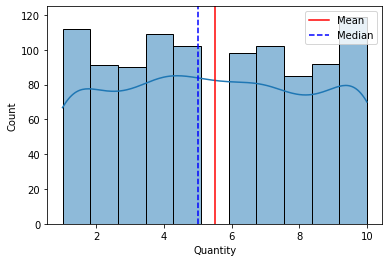

In [915]:
sns.histplot(data = df['Quantity'],kde = True)
plt.axvline(x=df['Quantity'].mean(),c='red',label='Mean')
plt.axvline(x=df['Quantity'].median(),c='blue',ls='--',label='Median')
plt.legend()

#### Tax 5%

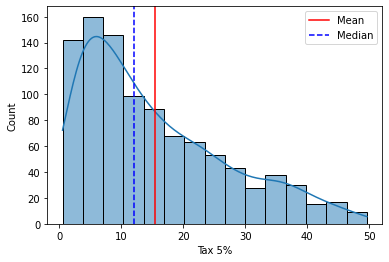

In [916]:
sns.histplot(data = df['Tax 5%'],kde = True)
plt.axvline(x=df['Tax 5%'].mean(),c='red',label='Mean')
plt.axvline(x=df['Tax 5%'].median(),c='blue',ls='--',label='Median')
plt.legend()

#### Total

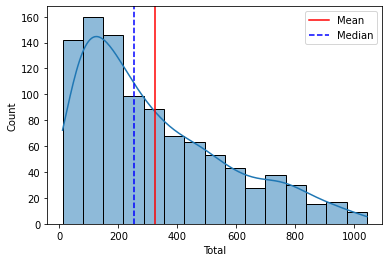

In [917]:
sns.histplot(data = df['Total'],kde = True)
plt.axvline(x=df['Total'].mean(),c='red',label='Mean')
plt.axvline(x=df['Total'].median(),c='blue',ls='--',label='Median')
plt.legend()

#### cogs

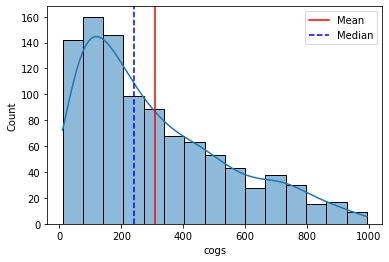

In [918]:
sns.histplot(data = df['cogs'],kde = True)
plt.axvline(x=df['cogs'].mean(),c='red',label='Mean')
plt.axvline(x=df['cogs'].median(),c='blue',ls='--',label='Median')
plt.legend()

#### gross margin percentage

In [919]:
df['gross margin percentage'].unique()

array([4.76190476])

#### gross income

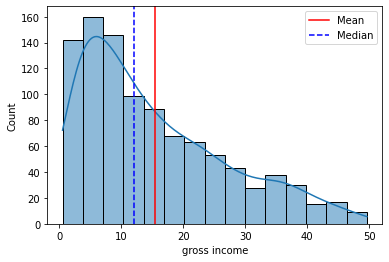

In [920]:
sns.histplot(data = df['gross income'],kde = True)
plt.axvline(x=df['gross income'].mean(),c='red',label='Mean')
plt.axvline(x=df['gross income'].median(),c='blue',ls='--',label='Median')
plt.legend()

#### Rating

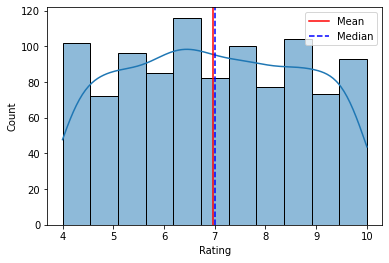

In [921]:
sns.histplot(data = df['Rating'],kde = True)
plt.axvline(x=df['Rating'].mean(),c='red',label='Mean')
plt.axvline(x=df['Rating'].median(),c='blue',ls='--',label='Median')
plt.legend()

Is your supermarket more popular with males or females?
---------------------------

In [922]:
 df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [923]:
Gender_types  = df['Gender'].value_counts().index
Gender_count = df['Gender'].value_counts().values

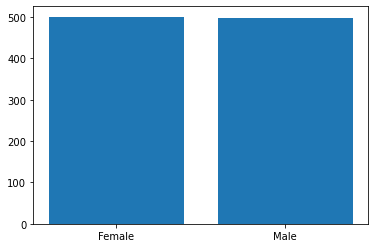

In [924]:
plt.bar(height=Gender_count , x = Gender_types )
plt.show()

Observation:
   * Our supermarket is equally popular among Males & Females , however among females its little more popular than among males.
    

What does the customer rating look like and can you also comment on its skewness?
----------------------------------

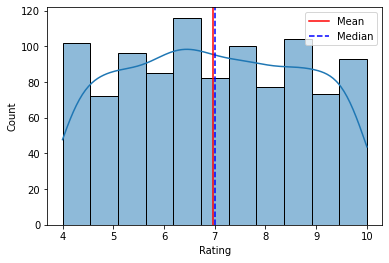

In [925]:
sns.histplot(data = df['Rating'],kde = True)
plt.axvline(x=df['Rating'].mean(),c='red',label='Mean')
plt.axvline(x=df['Rating'].median(),c='blue',ls='--',label='Median')
plt.legend()

### Skewed data

 * A varible is symmetrical variable if skew value is between -0.5 & 0.5

 * A varible is moderatley skewed variable if skew value is between -1 & -0.5 or 0.5 & 1

 * A varible is highly skewed variable if skew value is below -1 or above 1

In [926]:
df['Rating'].skew()

0.00900964876573073

Observation:
   * Mean & Meadian of Rating feature are nearly equal . This suggests that data is normally distributed.
   
   * And also skew value for Rating Column once again suggests that data is highly symmetrical & Noramlly distributed.


### What can you say about the aggregate sales across the branches?

In [927]:
d1  = df.groupby(['Branch']).Total.agg('sum')

In [928]:
df['Total'].sum()

322966.749

In [929]:
d1

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

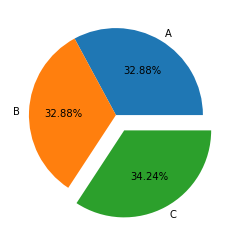

In [930]:
tempp = [0,0,0.2]
plt.pie(x=d1.values , labels = ['A','B','C'] , autopct = '%.2f%%',explode = tempp)
plt.show()

Observation:
   * Total revenue generated by Branch C greater than other branches.
   
   * This is little interesting because total count of orders for branch C are less than total count of orders for branch A &
     total count of orders for branch B , yet revenue generated greater than both of them.
    
   * This might be because sale of more number of costly products in Branch C.   
    

### Which is the most popular payment method used by customers?

In [931]:
Payment_types  = df['Payment'].value_counts().index
Payment_type_count = df['Payment'].value_counts().values

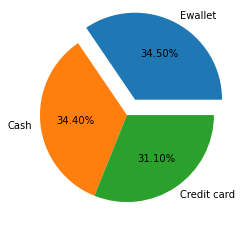

In [932]:
tem = [0.2,0,0]
plt.pie(x=Payment_type_count , labels = Payment_types , autopct = '%.2f%%',explode = tem)
plt.show()

Observation:

   *  Most customers of the supermarket are preferring payment through Ewallet/cash.
    
   * credit card type of payment is least preferred comparing to others

### Does gross income affect customer ratings?

<AxesSubplot:xlabel='gross income', ylabel='Rating'>

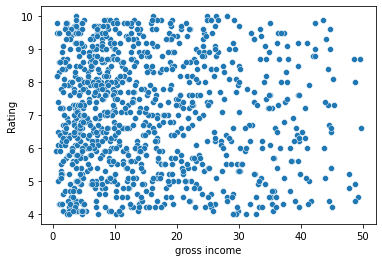

In [933]:
sns.scatterplot(x='gross income',y='Rating',data=df)  # relation between 

In [934]:
df['gross income'].corr(df['Rating'] , method  = 'spearman') # correlation coefficient
                                                             # chose method as spearman because gross income is right skewed.                                   

-0.017225932601977776

Observation:
   * From both the sactter plot & correlation coefficient its clear that gross income & rating are not linearly correlated 
   
   
   * Hence , there is no effect of gross income on Rating given by the customers 
    

### Which is the most profitable branch? 

* To find out the Branch which gives our supermarket more profit , it helpful to create a profit feature contain profit amount for each transaction

* Formula:

    Profit = (revenue*profit_percentage)/100

In [935]:
df['profit'] = (df['Total']*df['gross margin percentage'])/100

In [936]:
df['profit'].head()

0    26.1415
1     3.8200
2    16.2155
3    23.2880
4    30.2085
Name: profit, dtype: float64

In [937]:
p32 = df.groupby(['Branch']).profit.sum()

In [938]:
p32

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: profit, dtype: float64

<AxesSubplot:xlabel='Branch'>

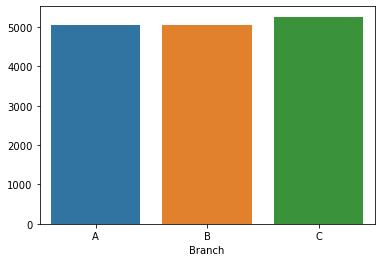

In [939]:
sns.barplot( x=p32.index , y = p32.values)

Observation:
   * Branch C is the most profitable branch .

### How is the relationship between Gender and Gross income?

In [940]:
p33 = df.groupby(['Gender'])['gross income'].sum()

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

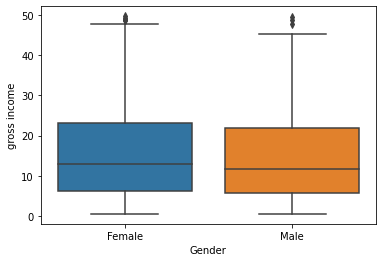

In [941]:
sns.boxplot(x=df['Gender'],y = df['gross income'])

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

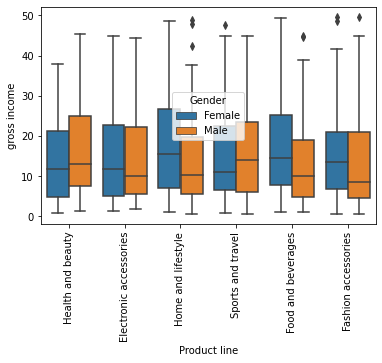

In [942]:
plt.xticks(rotation =90)
sns.boxplot(x=df['Product line'],y = df['gross income'] , hue = df['Gender'] )

Observation:
   * Our Supermarket is generating more income from female customers compared with male customers.
   
   * In most of the product lines except health and beauty & sports and travel ,females customers have high median value of     
     gross income than male customers.
     
   * So that's why our supermarket is getting more income from female customers 
    

    

### Can you see any time trend in gross income?

In [943]:
# Extracting Year from the date feature

df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Year'].unique()

array([2019], dtype=int64)

* Since our data is for year 2019 , we have every entry as 2019 

In [944]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'].unique()

array([1, 3, 2], dtype=int64)

In [945]:
df['Month_name'] = df['Month'].map({1:'January',2:'Febraury',3:'March'})
df['Month_name'].head()

0     January
1       March
2       March
3     January
4    Febraury
Name: Month_name, dtype: object

* We can confirm from this that our data has only first three months data of 2019

In [946]:
df.groupby(['Month'])['gross income'].sum()

Month
1    5537.708
2    4629.494
3    5212.167
Name: gross income, dtype: float64

<AxesSubplot:>

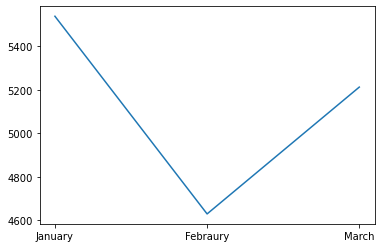

In [947]:
sd = df.groupby(['Month'])['gross income'].sum()
sns.lineplot(x = ['January','Febraury','March'], y =sd.values)

Observation:
   * There is a decreasing trend in supermarkets gross income

### Which product line helps you generate the most income?

In [948]:
p36 = df.groupby(['Product line'])['gross income'].sum()

Text(0, 0.5, 'Gross Income')

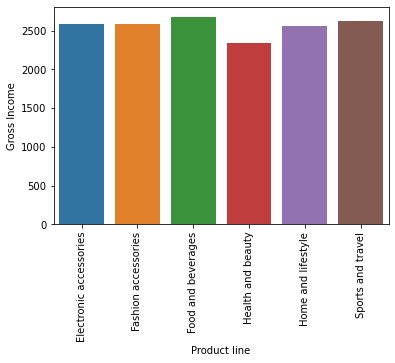

In [949]:
plt.xticks(rotation = 90)
sns.barplot(y =p36.values , x= p36.index )
plt.ylabel('Gross Income')

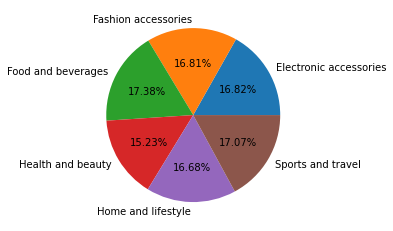

In [950]:
plt.pie(x=p36.values , labels = p36.index , autopct = '%.2f%%')
plt.show()

Observation:
   * products which fall under product line of Food & beverages are helping our supermarket generate more income,
     followed by Electronic accessories & Fashion accessories.

### What is the spending pattern of both males and females, meaning in which category do they spend more?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

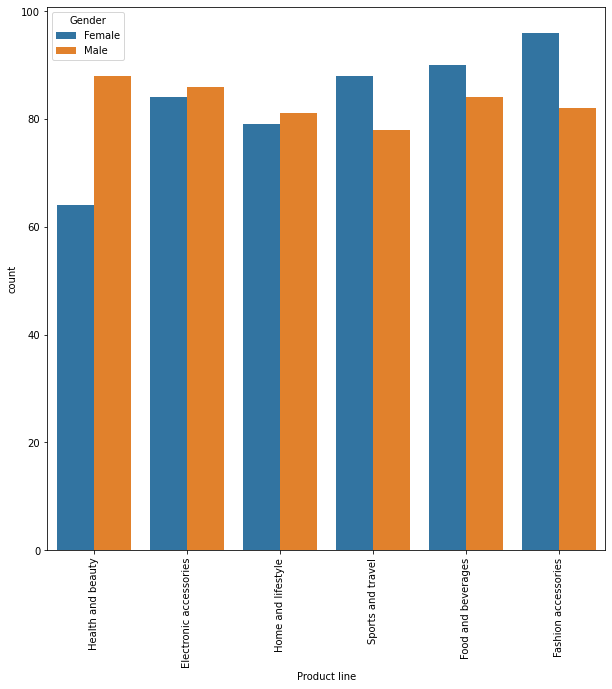

In [951]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['Product line'] , hue = df['Gender'] )
plt.xticks(rotation = 90)

* For the categories Health and beauty, Electronic accessories , Home and lifestyle supermarket recieved more number of orders from male customers than females.

*  For the categories Sports and travel , Food and beverages , Fashion accessories supermarket recieved more number of orders from female customers than males. 

* we cann't blindy go by more number of orders received because here we also have look the quantity per order & total amount spent for each order. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

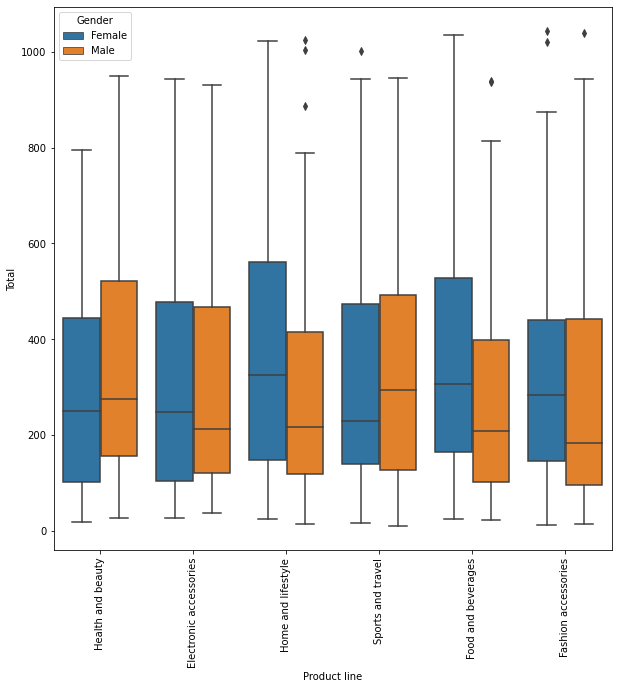

In [952]:
plt.figure(figsize = (10,10))
sns.boxplot(x=df['Product line'] ,y=df['Total'] , hue = df['Gender'] )
plt.xticks(rotation = 90)

Observations:
   * In sync with number of orders generated for " Health and beauty " category by male customers, the amount spent by male    
     customers on this category is greater than female customers.
     
   
   * For " Electronic accessories " product line though male customers have more orders , the total amount spent by female 
     customers higher than the male customers amount spent. 
     

   * Though supermarket recevied more number of orders from male customers for " Home and lifestyle " product line , the total 
     amount spent by male customers for this category is less than total amount spent by females.
     
   
   * The case is reverse in " Sports and travel "  product line , though Female customers have more number of orders more amount 
     was spent by Male customers. 
     
     
   * For the product lines Food and beverages , Fashion accessories more amount was by Female customers.
   

### How many products are bought by customers?

In [953]:
df['Quantity'].sum()

5510

In [954]:
df.groupby(['Customer type'])['Quantity'].sum()

Customer type
Member    2785
Normal    2725
Name: Quantity, dtype: int64

In [955]:
p37 = df.groupby(['Customer type'])['Quantity'].sum()

<AxesSubplot:xlabel='Customer type'>

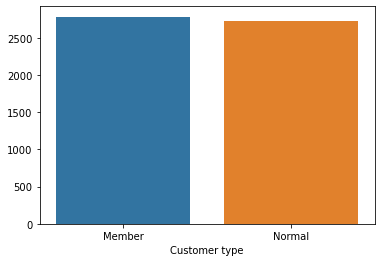

In [956]:
sns.barplot(x=p37.index , y = p37.values )

Observation:

   *  Member customers bought more products than Normal customers.
   
       Member customers bought - 2785 products
       
       Normal customers bought - 2725 products
    

### Which day of the week has maximum sales? 

In [957]:
# Extracting day number of a week & Creating a feature 'Num_Day_of_week' to store that number.

df['Num_Day_of_week'] = pd.DatetimeIndex(df['Date']).dayofweek

In [958]:
# Calculating total revenue for each day of the week 

p38 =df.groupby('Num_Day_of_week').Total.sum()

In [959]:
#To see the exact values for each day of the week  , 0-6 notation for Monday to Sunday  

df.groupby('Num_Day_of_week').Total.sum()

Num_Day_of_week
0    37899.0780
1    51482.2455
2    43731.1350
3    45349.2480
4    43926.3405
5    56120.8095
6    44457.8925
Name: Total, dtype: float64

<AxesSubplot:ylabel='Total(Revenue)'>

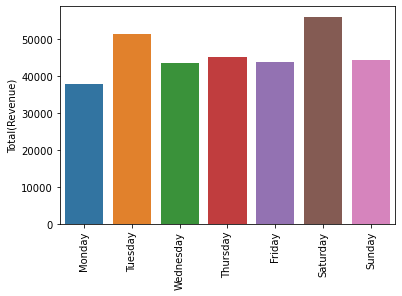

In [960]:
plt.xticks(rotation = 90)
plt.ylabel('Total(Revenue)')
sns.barplot(x=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],y=p38.values)

Observation:

   * Saturday of the week has maximum sales followed by Tuesday.  

### Which hour of the day is busiest? 

In [961]:
# Exploring the Time feature

df['Time'].head()

0    13:08
1    10:29
2    13:23
3    20:33
4    10:37
Name: Time, dtype: object

In [962]:
# Changing Time feature from Object type to datetime object & extracting time from datetime object

df['Changed_Time1'] = pd.to_datetime(df['Time']).dt.time

In [963]:
df['Changed_Time1'].head()

0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: Changed_Time1, dtype: object

* Time is present in 24 hour format

In [964]:
# Extracting Hour data from Changed_Time1 feature

df['hour_of_the_day'] = pd.DatetimeIndex(df['Time']).hour

In [965]:
df['hour_of_the_day'].head()

0    13
1    10
2    13
3    20
4    10
Name: hour_of_the_day, dtype: int64

In [966]:
p39 = df.groupby('hour_of_the_day')

In [967]:
df.groupby('hour_of_the_day').size()

hour_of_the_day
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
dtype: int64

<AxesSubplot:xlabel='hour_of_the_day', ylabel='count'>

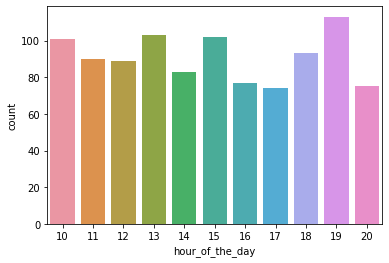

In [968]:
# ploting number of orders received for each hour day 

sns.countplot(x=df['hour_of_the_day'] )

Observation:

  * At 19:00(i.e., 7:00 PM ) supermarket received maximum number orders overall.  
    

### Which product line should your supermarket focus on?

In [969]:
df.groupby('Product line')['gross income'].sum().sort_values(ascending = False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [970]:
df.groupby('Product line')['Total'].sum().sort_values(ascending = False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [971]:
df.groupby('Product line')['Quantity'].sum().sort_values(ascending = False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

Observation:

   *   Supermarket should focus on Fashion accessories and Sports & Travel product lines because per   
       product profit amount gained for these lines high compared with other product ines.

In [972]:
# food - 58.9 , 2.80
# sports - 59.9 , 2.85
# elec - 55.9 , 2.66 
# fas - 60.2, 2.867
# home - 59.1 , 2.815
# heal - 57.6 , 2.74

### Which city should be chosen for expansion and what products should be focussed on?

In [973]:
df.groupby(['Product line','City']).size().reset_index()

,Product line,City,0
0,Electronic accessories,Mandalay,55
1,Electronic accessories,Naypyitaw,55
2,Electronic accessories,Yangon,60
3,Fashion accessories,Mandalay,62
4,Fashion accessories,Naypyitaw,65
5,Fashion accessories,Yangon,51
6,Food and beverages,Mandalay,50
7,Food and beverages,Naypyitaw,66
8,Food and beverages,Yangon,58
9,Health and beauty,Mandalay,53


Observation:
   * As we find out in our earlier anaylsis the City Naypyitaw has higher aggregate sales & it is 
     generating more profit to supermarket than other branches though it has low order count.
   * Th focus should be on Branch C in Naypyitaw and make our supermarket more available to the 
      customers by opening a new branch.